# Классификатор Xception Network, реализованный на Keras и Tensorflow и обученный на датасете Cats and Dogs.
Может отличать фотографии с кошками от фотографий с собаками.

Несколько ячеек ниже: для скачивания и распаковки датасета в Colab в окружении на основе Linux.

Эти же ячейки можно выполнить на Windows, если необходимые утилиты (rm, ls, curl, unzip и пр.) будут установлены с помощью [Cygwin](https://cygwin.com/install.html).

Либо можно вручную скачать и распаковать датасет [Cats and Dogs](https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip) на один уровень с ноутбуком.

In [1]:
# Очищаем workspace от сохранённых обученных моделей от предыдущих запусков.
#!rm -rf xception_network_cats_and_dogs_checkpoints/
#!rm -rf xception_network_cats_and_dogs/

In [2]:
# Очищаем workspace от скачанного файла от предыдущих запусков.
#!rm -f kagglecatsanddogs_3367a.zip

In [3]:
# Очищаем workspace от распакованного датасета от предыдущих запусков.
#!rm -rf PetImages/

In [27]:
!uname -a

Linux b69ded11f7b6 6.1.58+ #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux


In [5]:
# Скачиваем датасет.
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   119M      0  0:00:06  0:00:06 --:--:--  127M


In [6]:
# Распаковываем датасет.
!unzip kagglecatsanddogs_5340.zip 'PetImages/**/*' -q

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: PetImages/Dog/550.jpg   
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImag

In [7]:
!ls

kagglecatsanddogs_5340.zip  PetImages  sample_data


In [8]:
!ls PetImages/Cat

0.jpg	   11250.jpg  1250.jpg	2500.jpg  3751.jpg  5000.jpg  6251.jpg	7501.jpg  8752.jpg
10000.jpg  11251.jpg  1251.jpg	2501.jpg  3752.jpg  5001.jpg  6252.jpg	7502.jpg  8753.jpg
10001.jpg  11252.jpg  1252.jpg	2502.jpg  3753.jpg  5002.jpg  6253.jpg	7503.jpg  8754.jpg
10002.jpg  11253.jpg  1253.jpg	2503.jpg  3754.jpg  5003.jpg  6254.jpg	7504.jpg  8755.jpg
10003.jpg  11254.jpg  1254.jpg	2504.jpg  3755.jpg  5004.jpg  6255.jpg	7505.jpg  8756.jpg
10004.jpg  11255.jpg  1255.jpg	2505.jpg  3756.jpg  5005.jpg  6256.jpg	7506.jpg  8757.jpg
10005.jpg  11256.jpg  1256.jpg	2506.jpg  3757.jpg  5006.jpg  6257.jpg	7507.jpg  8758.jpg
10006.jpg  11257.jpg  1257.jpg	2507.jpg  3758.jpg  5007.jpg  6258.jpg	7508.jpg  8759.jpg
10007.jpg  11258.jpg  1258.jpg	2508.jpg  3759.jpg  5008.jpg  6259.jpg	7509.jpg  875.jpg
10008.jpg  11259.jpg  1259.jpg	2509.jpg  375.jpg   5009.jpg  625.jpg	750.jpg   8760.jpg
10009.jpg  1125.jpg   125.jpg	250.jpg   3760.jpg  500.jpg   6260.jpg	7510.jpg  8761.jpg
1000.jpg   11260.jpg  1260

In [9]:
!ls PetImages/Dog

0.jpg	   11250.jpg  1250.jpg	2500.jpg  3751.jpg  5000.jpg  6251.jpg	7501.jpg  8752.jpg
10000.jpg  11251.jpg  1251.jpg	2501.jpg  3752.jpg  5001.jpg  6252.jpg	7502.jpg  8753.jpg
10001.jpg  11252.jpg  1252.jpg	2502.jpg  3753.jpg  5002.jpg  6253.jpg	7503.jpg  8754.jpg
10002.jpg  11253.jpg  1253.jpg	2503.jpg  3754.jpg  5003.jpg  6254.jpg	7504.jpg  8755.jpg
10003.jpg  11254.jpg  1254.jpg	2504.jpg  3755.jpg  5004.jpg  6255.jpg	7505.jpg  8756.jpg
10004.jpg  11255.jpg  1255.jpg	2505.jpg  3756.jpg  5005.jpg  6256.jpg	7506.jpg  8757.jpg
10005.jpg  11256.jpg  1256.jpg	2506.jpg  3757.jpg  5006.jpg  6257.jpg	7507.jpg  8758.jpg
10006.jpg  11257.jpg  1257.jpg	2507.jpg  3758.jpg  5007.jpg  6258.jpg	7508.jpg  8759.jpg
10007.jpg  11258.jpg  1258.jpg	2508.jpg  3759.jpg  5008.jpg  6259.jpg	7509.jpg  875.jpg
10008.jpg  11259.jpg  1259.jpg	2509.jpg  375.jpg   5009.jpg  625.jpg	750.jpg   8760.jpg
10009.jpg  1125.jpg   125.jpg	250.jpg   3760.jpg  500.jpg   6260.jpg	7510.jpg  8761.jpg
1000.jpg   11260.jpg  1260

Завершили скачивание и распаковку датасета. Это можно сделать либо ячейками выше, либо вручную.

In [10]:
# Понадобится для работы с файлами.
import os

In [11]:
import tensorflow as tf

In [12]:
# Отфильтруем изображения, у которых в заголовке нет JFIF. Нам нужна информация о разрешении и соотношении сторон.
for folder_name in ("Cat", "Dog"):
  del_img_cnt = 0
  for file_name in os.listdir(f"PetImages/{folder_name}"):
    file_path = f"PetImages/{folder_name}/{file_name}"
    # Используем менеджер контекста (with) при чтении файла. Файл будет закрыт автоматически при выходе из блока кода.
    with open(file_path, "rb") as file:
      # Ищем в первых 4 байтах файла байты "JFIF" (в ASCII / UTF-8 кодах).
      has_jfif = tf.compat.as_bytes("JFIF") in file.peek(4)
      if not has_jfif:
        file.close()
        os.remove(file_path)
        del_img_cnt += 1
  print(f"Удалено {del_img_cnt} изображений из директории {folder_name}")

Удалено 759 изображений из директории Cat
Удалено 831 изображений из директории Dog


In [13]:
# Генерируем обучающую и валидационной выборки.
VALIDATION_SPLIT = 0.2
SEED = 1337
IMAGE_SIZE = (180, 180)
BATCH_SIZE = 32

# Keras понимает, что 2 класса, потому что 2 директории (Cats, Dogs).
# Автоматически будут созданы два лейбла (0 - Cat, 1 - Dog).

training_images = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split = VALIDATION_SPLIT,
    subset = "training",
    seed = SEED,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
)

validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split = VALIDATION_SPLIT,
    subset = "validation",
    seed = SEED,
    image_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Found 23410 files belonging to 2 classes.
Using 4682 files for validation.


In [14]:
print(type(validation_images))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [15]:
print(type(training_images.take(1)))

<class 'tensorflow.python.data.ops.take_op._TakeDataset'>


In [16]:
# Посмотрим на изображения.
import matplotlib.pyplot as plt

plt.figure(figsize=(180, 180))
for images, labels in training_images.take(1):
    for i in range(20):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

In [17]:
# Сделаем вспомогательную структуру для наращивания обучающей выборки.
augmentation_network = tf.keras.Sequential(
    [
        # Тоже слои, но реализуют детерминированные алгоритмы.
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

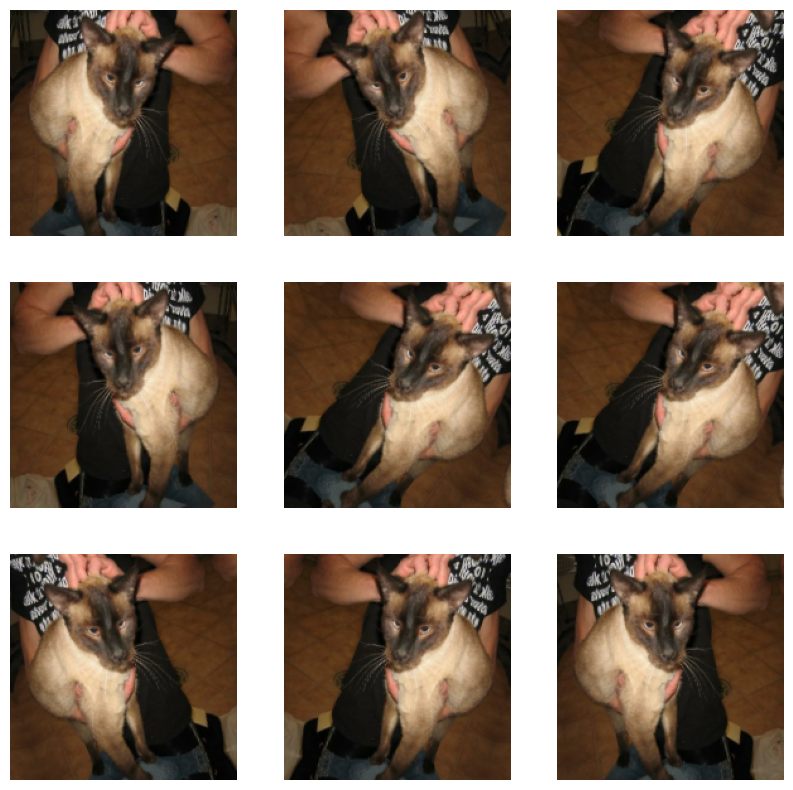

In [18]:
# Пример того, как она работает.
plt.figure(figsize=(10, 10))
for images, _ in training_images.take(1):
    for i in range(9):
        augmented_images = augmentation_network(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [19]:
# Нарастим обучающую выборку.
augmented_training_images = training_images.map(
  lambda image, label: (augmentation_network(image, training = True), label)
)

In [20]:
# Буферизируем ввод.
augmented_training_images = augmented_training_images.prefetch(buffer_size=BATCH_SIZE)
validation_images = validation_images.prefetch(buffer_size=BATCH_SIZE)

In [21]:
# Метод для создания модели Xception network.
def build_xception_network(input_shape, num_classes):
    inputs = tf.keras.Input(shape = input_shape)

    # Наращивание можно сделать частью архитектуры нейронной сети.
    #x = augmentation_network(inputs)

    x = tf.keras.layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
    x = tf.keras.layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    x = tf.keras.layers.Conv2D(64, 3, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    previous_block_activation = x

    for size in [128, 256, 512, 728]:
        x = tf.keras.layers.Activation("relu")(x)
        x = tf.keras.layers.SeparableConv2D(size, 3, padding="same")(x)
        x = tf.keras.layers.BatchNormalization()(x)

        x = tf.keras.layers.Activation("relu")(x)
        x = tf.keras.layers.SeparableConv2D(size, 3, padding="same")(x)
        x = tf.keras.layers.BatchNormalization()(x)

        x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)

        residual = tf.keras.layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = tf.keras.layers.add([x, residual])
        previous_block_activation = x

    x = tf.keras.layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(units, activation=activation)(x)
    return tf.keras.Model(inputs, outputs)

In [22]:
# Создаём модель.
xception_network_cats_and_dogs = build_xception_network(input_shape = IMAGE_SIZE + (3,), num_classes = 2)

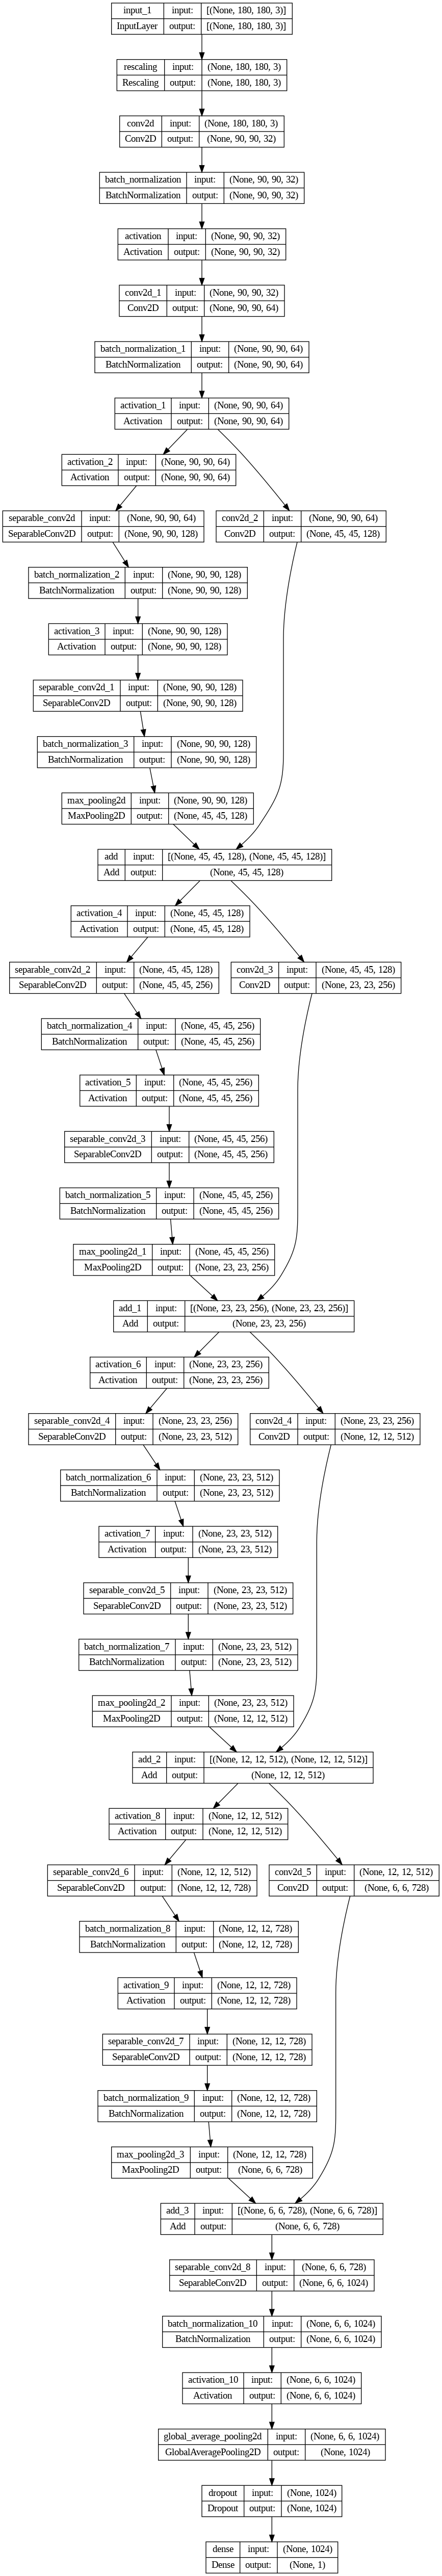

In [23]:
# Визуализируем её.
tf.keras.utils.plot_model(xception_network_cats_and_dogs, show_shapes = True)

In [24]:
# Либо обучаем нейронную сеть.
# (!) Долгий процесс.
EPOCHS = 20

# callback для сохранения результатов обучения в формате Keras (h5) после каждой эпохи обучения.
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("xception_network_cats_and_dogs_checkpoints/epoch_{epoch}.h5")
]
xception_network_cats_and_dogs.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model_history = xception_network_cats_and_dogs.fit(
    augmented_training_images, epochs=EPOCHS, callbacks=callbacks, validation_data=validation_images
)
# Сохраняем модель целиком в формате TensorFlow (saved_model.pb + variables/).
xception_network_cats_and_dogs.save("xception_network_cats_and_dogs");

Epoch 1/20
586/586 [==============================] - ETA: 0s - loss: 0.6087 - accuracy: 0.6764

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


586/586 [==============================] - 142s 206ms/step - loss: 0.6087 - accuracy: 0.6764 - val_loss: 0.7477 - val_accuracy: 0.5641
Epoch 2/20
586/586 [==============================] - 127s 216ms/step - loss: 0.4389 - accuracy: 0.7944 - val_loss: 0.4971 - val_accuracy: 0.7883
Epoch 3/20
586/586 [==============================] - 122s 207ms/step - loss: 0.3625 - accuracy: 0.8431 - val_loss: 0.3170 - val_accuracy: 0.8706
Epoch 4/20
586/586 [==============================] - 124s 211ms/step - loss: 0.3073 - accuracy: 0.8691 - val_loss: 0.2836 - val_accuracy: 0.8868
Epoch 5/20
586/586 [==============================] - 128s 218ms/step - loss: 0.2582 - accuracy: 0.8915 - val_loss: 0.7607 - val_accuracy: 0.6606
Epoch 6/20
586/586 [==============================] - 122s 208ms/step - loss: 0.2202 - accuracy: 0.9077 - val_loss: 0.5200 - val_accuracy: 0.7723
Epoch 7/20
586/586 [==============================] - 124s 210ms/step - loss: 0.1991 - accuracy: 0.9179 - val_loss: 0.6265 - val_accura

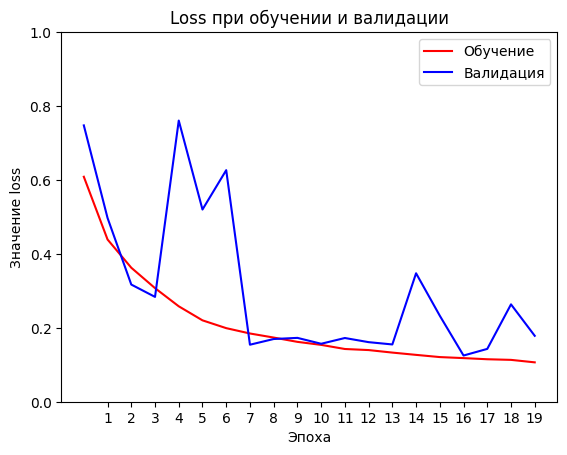

In [25]:
loss = model_history.history["loss"]
val_loss = model_history.history["val_loss"]

plt.figure()
plt.plot(model_history.epoch, loss, "r", label="Обучение")
plt.plot(model_history.epoch, val_loss, "b", label="Валидация")
plt.title("Loss при обучении и валидации")
plt.xlabel("Эпоха")
plt.xticks(range(1, EPOCHS))
plt.ylabel("Значение loss")
plt.ylim([0, 1])
plt.legend()
plt.show()

In [31]:
# Либо загружаем весовые коэффециенты от заранее обученной модели в формате Keras (h5).
xception_network_cats_and_dogs.load_weights('xception_network_cats_and_dogs_checkpoints/epoch_8.h5')

In [ ]:
# Либо загружаем заранее обученную модель целиком из формата TensorFlow (saved_model.pb + variables/).
#xception_network_cats_and_dogs = tf.keras.models.load_model("xception_network_cats_and_dogs")

1/1 [==============================] - 0s 34ms/step
Score: [0.30661535]
С вероятностью 69.34 процентов на картинке изображена кошка, с вероятностью 30.66 процентов - собака.


(-0.5, 179.5, 179.5, -0.5)

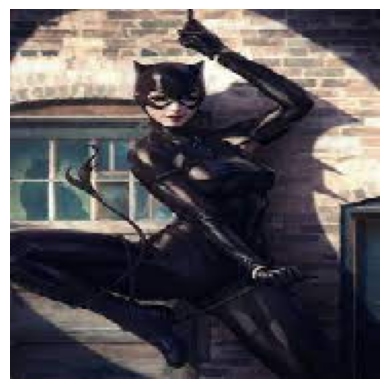

In [46]:
img = tf.keras.preprocessing.image.load_img(
    "catwoman-2.jpg", target_size=IMAGE_SIZE
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = xception_network_cats_and_dogs.predict(img_array)
score = predictions[0]
print(f"Score: {score}")
print(
    "С вероятностью %.2f процентов на картинке изображена кошка, с вероятностью %.2f процентов - собака."
    % (100 * (1 - score), 100 * score)
)

plt.imshow(img)
plt.axis("off")

Домашнее задание:
* Попробуем подключить TPU (запросить в Colab среду выполнения с TPU и добавить после импорта TensorFlow инициализацию распределённой конфигурации):
```
# Создаём TPU cluster resolver.
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
# С его помощью подключиться к кластеру.
tf.config.experimental_connect_to_cluster(resolver)
# Инициализировать TPU.
tf.tpu.experimental.initialize_tpu_system(resolver)
# Смотрим в конфигурации TensorFlow, есть ли среди доступных логических устройств TPU.
print("Доступные логические устройства: ", tf.config.list_logical_devices())
```
Попробуем обучить нейронную сеть и посмотреть, насколько быстрее она обучается.